# 00 import libraries

In [87]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 01 load data

In [88]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [89]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [90]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [91]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


# 03 preprocessing

In [92]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [93]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 04 data exploration

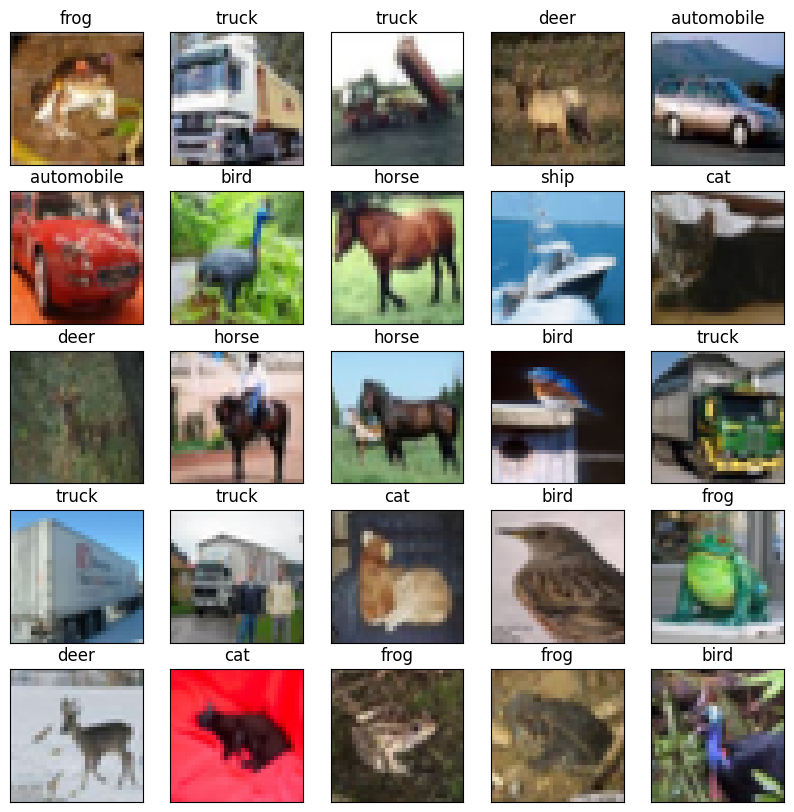

In [94]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i][0]])
plt.show()

# 05 Hyper parameter

In [95]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [96]:
def build_model(hp: HyperParameters):
    model = keras.models.Sequential()
    for i in range(hp.Int('num_conv_layers', 1, 5)):
        if i == 0:
            model.add(keras.layers.Conv2D(hp.Int('filters_'+str(i), min_value=32, max_value=128, step=16),
                                          (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
        else:
            model.add(keras.layers.Conv2D(hp.Int('filters_'+str(i), min_value=32, max_value=128, step=16),
                                          (3, 3), activation='relu', padding='same'))
        model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    for i in range(hp.Int('num_dense_layers', 1, 5)):
        model.add(keras.layers.Dense(units = hp.Int('units_'+str(i), min_value=32, max_value=1024, step=32), 
                                     activation = 'relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                  loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),
                  metrics = ['accuracy'])
    return model

In [97]:
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 5,
    executions_per_trial = 3,
    directory = 'Final proj',
    project_name = 'hyperparameterTuning')

INFO:tensorflow:Reloading Tuner from Final proj/hyperparameterTuning/tuner0.json


INFO:tensorflow:Reloading Tuner from Final proj/hyperparameterTuning/tuner0.json


In [98]:
tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Search space summary
Default search space size: 13
num_conv_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
filters_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
num_dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
filters_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
filters_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
filters_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling':

INFO:tensorflow:Oracle triggered exit


In [99]:
print("Best hyperparameters: ")
print("Learning rate: ", best_hps.get('learning_rate'))
print("Number of conv layers: ", best_hps.get('num_conv_layers'))
print("Number of dense layers: ", best_hps.get('num_dense_layers'))

for i in range(best_hps.get('num_conv_layers')):
    print("Number of filters in conv layer ", i+1, ": ", best_hps.get('filters_'+str(i)))

for i in range(best_hps.get('num_dense_layers')):
    print("Number of units in dense layer ", i+1, ": ", best_hps.get('units_'+str(i)))

Best hyperparameters: 
Learning rate:  0.0001
Number of conv layers:  2
Number of dense layers:  5
Number of filters in conv layer  1 :  64
Number of filters in conv layer  2 :  64
Number of units in dense layer  1 :  672
Number of units in dense layer  2 :  160
Number of units in dense layer  3 :  256
Number of units in dense layer  4 :  832
Number of units in dense layer  5 :  160


# 06 First model 

In [110]:
class BestCNN(keras.Model):
    def __init__(self):
        super(BestCNN, self).__init__()
        self.conv1 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))
        self.maxpool1 = keras.layers.MaxPooling2D((2, 2))
        self.conv2 = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')
        self.maxpool2 = keras.layers.MaxPooling2D((2, 2))

        self.flatten = keras.layers.Flatten()
        self.dense1 = keras.layers.Dense(672, activation='relu')
        self.dense2 = keras.layers.Dense(160, activation='relu')
        self.dense3 = keras.layers.Dense(256, activation='relu')
        self.dense4 = keras.layers.Dense(832, activation='relu')
        self.dense5 = keras.layers.Dense(160, activation='relu')
        self.out = keras.layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)

        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.dense5(x)

        return self.out(x)
model = BestCNN()
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=['accuracy'])
model.build(input_shape=(1, 32, 32, 3)) 



Model: "best_cnn_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          multiple                  1792      
                                                                 
 max_pooling2d_20 (MaxPooli  multiple                  0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          multiple                  36928     
                                                                 
 max_pooling2d_21 (MaxPooli  multiple                  0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        multiple                  0         
                                                                 
 dense_44 (Dense)            multiple                  2

# second model

In [101]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

model2.summary()



model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 1024)             

# 06 model training

In [103]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5888 - accuracy: 0.4163 - val_loss: 1.2953 - val_accuracy: 0.5318
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2063 - accuracy: 0.5655 - val_loss: 1.1072 - val_accuracy: 0.6105
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0327 - accuracy: 0.6316 - val_loss: 1.0067 - val_accuracy: 0.6441
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9044 - accuracy: 0.6801 - val_loss: 0.9397 - val_accuracy: 0.6711
Epoch 5/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8038 - accuracy: 0.7155 - val_loss: 0.9473 - val_accuracy: 0.6762
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7059 - accuracy: 0.7529 - val_loss: 0.8847 - val_accuracy: 0.6940
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6064 - accuracy: 0.7895 - val_loss: 0.8835 -

# 07 model results

In [105]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("First Model Test accuracy: ", test_accuracy)
print("First Model Test loss: ", test_loss)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

print("Second Model Test accuracy: ", test_accuracy)
print("Second Model Test loss: ", test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.9719 - accuracy: 0.7101
First Model Test accuracy:  0.710099995136261
First Model Test loss:  0.971899688243866
313/313 [==============================] - 1s 3ms/step - loss: 0.9214 - accuracy: 0.7081
Second Model Test accuracy:  0.7081000208854675
Second Model Test loss:  0.9214330315589905


# 07-01 model accuracy and loss over time

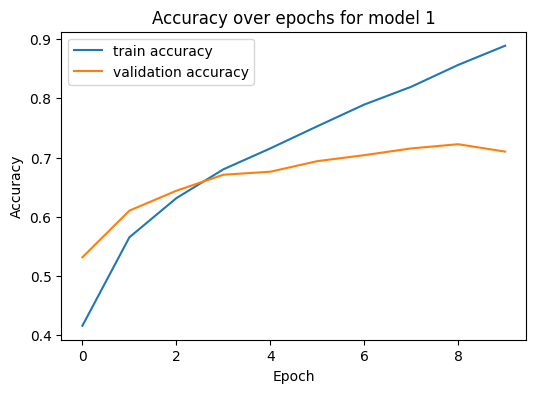

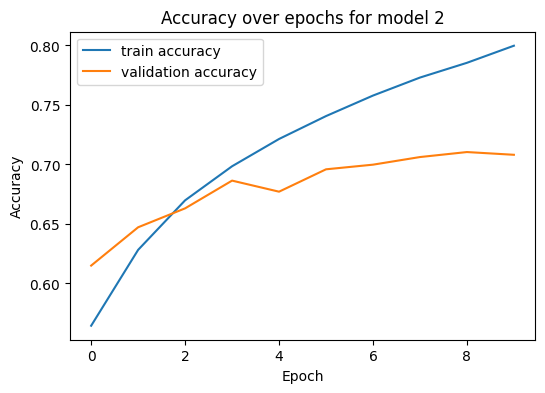

In [106]:

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy over epochs for model 1')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history2.history['accuracy'], label='train accuracy')
plt.plot(history2.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy over epochs for model 2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


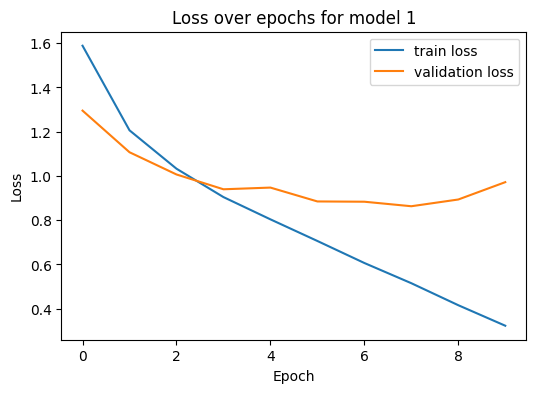

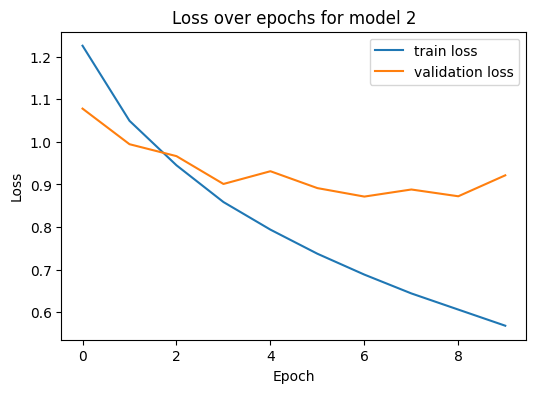

In [107]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss over epochs for model 1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.title('Loss over epochs for model 2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# 08 self testing

In [108]:
import random

1/1 [==============================] - 0s 55ms/step


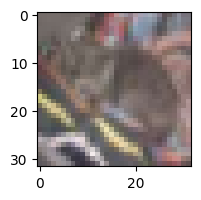

Predicted Label:  6
Actual Label:  [3]
1/1 [==============================] - 0s 9ms/step


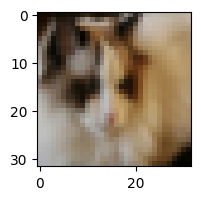

Predicted Label:  5
Actual Label:  [3]
1/1 [==============================] - 0s 10ms/step


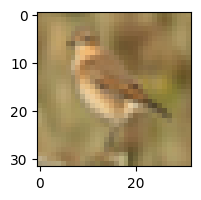

Predicted Label:  2
Actual Label:  [2]
1/1 [==============================] - 0s 13ms/step


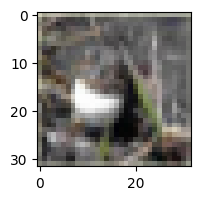

Predicted Label:  7
Actual Label:  [6]
1/1 [==============================] - 0s 10ms/step


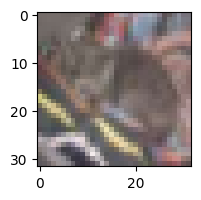

Predicted Label:  6
Actual Label:  [3]
1/1 [==============================] - 0s 9ms/step


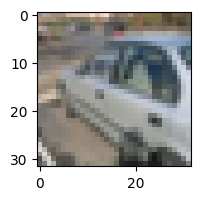

Predicted Label:  2
Actual Label:  [1]
1/1 [==============================] - 0s 10ms/step


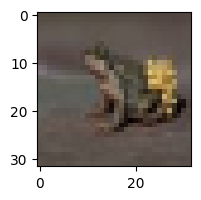

Predicted Label:  6
Actual Label:  [6]
1/1 [==============================] - 0s 12ms/step


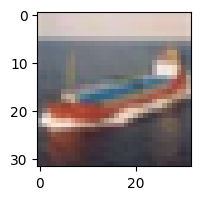

Predicted Label:  8
Actual Label:  [8]
1/1 [==============================] - 0s 12ms/step


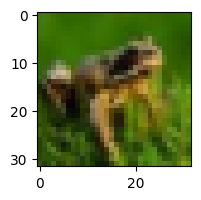

Predicted Label:  6
Actual Label:  [6]
1/1 [==============================] - 0s 9ms/step


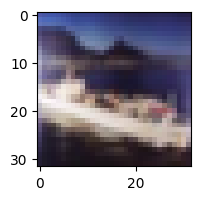

Predicted Label:  0
Actual Label:  [8]
1/1 [==============================] - 0s 31ms/step


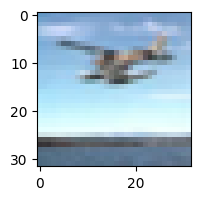

Predicted Label:  0
Actual Label:  [0]
1/1 [==============================] - 0s 8ms/step


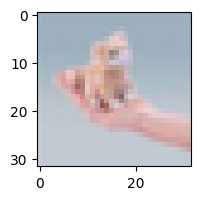

Predicted Label:  2
Actual Label:  [3]
1/1 [==============================] - 0s 9ms/step


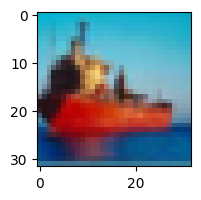

Predicted Label:  8
Actual Label:  [8]
1/1 [==============================] - 0s 8ms/step


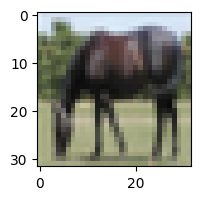

Predicted Label:  7
Actual Label:  [7]
1/1 [==============================] - 0s 8ms/step


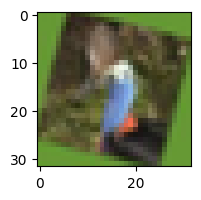

Predicted Label:  2
Actual Label:  [2]
1/1 [==============================] - 0s 8ms/step


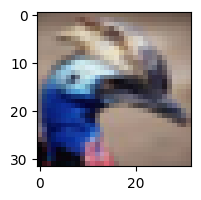

Predicted Label:  1
Actual Label:  [2]
1/1 [==============================] - 0s 9ms/step


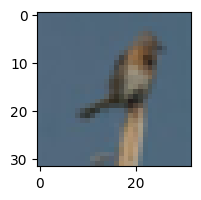

Predicted Label:  2
Actual Label:  [2]
1/1 [==============================] - 0s 8ms/step


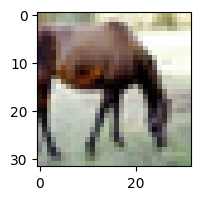

Predicted Label:  7
Actual Label:  [7]
1/1 [==============================] - 0s 10ms/step


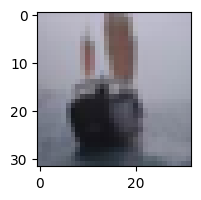

Predicted Label:  8
Actual Label:  [8]
1/1 [==============================] - 0s 8ms/step


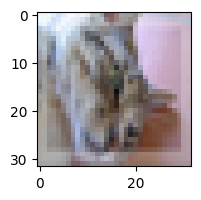

Predicted Label:  3
Actual Label:  [3]


In [109]:
for _ in range(10):
    i = random.randint(0, len(X_test) - 1) 
    img = np.expand_dims(X_test[i], axis=0) 
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction) 

    
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[i])
    plt.show()
    
    print("Predicted Label: ", predicted_label)
    print("Actual Label: ", y_test[i])
    
for _ in range(10):
    i = random.randint(0, len(X_test) - 1) 
    img = np.expand_dims(X_test[i], axis=0) 
    prediction = model2.predict(img)
    predicted_label = np.argmax(prediction) 

    
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[i])
    plt.show()
    
    print("Predicted Label: ", predicted_label)
    print("Actual Label: ", y_test[i])
